In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [37]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 784])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 10])

In [38]:
W1 = tf.Variable(tf.random_normal(shape=[784, 256], stddev=0.01), name="w1val")
L1 = tf.nn.relu(tf.matmul(X, W1))

In [39]:
W2 = tf.Variable(tf.random_normal(shape=[256, 256], stddev=0.01), name="w2val")
L2 = tf.nn.relu(tf.matmul(L1, W2))

In [40]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01), name="w3val")
model = tf.matmul(L2, W3)

In [41]:
# param_list = [W1, W2, W3]
saver = tf.train.Saver({"w1val":W1, "w2val":W2, "w3val":W3})

In [47]:
im = Image.open("./temp.png")

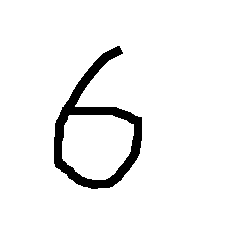

In [48]:
im

In [49]:
img2 = im.resize((28,28))
b = img2.tobytes("raw","A")
ll = [i/255 for i in b ]

In [50]:
len(ll)

784

In [51]:
ll = np.array(ll)
ll.shape

(784,)

In [52]:
ll = ll.reshape(1,784)
ll.shape

(1, 784)

In [53]:
with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())  #변수를 초기화 해서 세팅이되면 파일에서 restore시 에러발생함
    saver.restore(sess, "./chkp_save2/mnist")
    predict = sess.run([model], feed_dict={X:ll})
    print(predict)
    predict = np.array(predict)
    print("shape:", predict.shape)
    print("result : ",np.argmax(predict[0], axis=1))

INFO:tensorflow:Restoring parameters from ./chkp_save2/mnist
[array([[-5.16816425, -6.6451149 , -4.69532156, -8.01078415, -0.78692555,
         6.74659967, -1.33783627, -5.33159351, -3.24365306, -2.43115902]], dtype=float32)]
shape: (1, 1, 10)
result :  [5]


In [54]:
img2

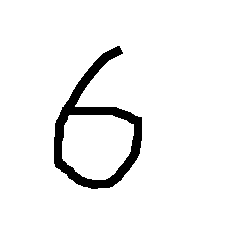

In [55]:
im

In [57]:
im.width

250

In [58]:
im.height

250

In [59]:
newImg = Image.frombytes(data=im.tobytes('raw','RGBA'),size=(250,250), mode='RGBA')

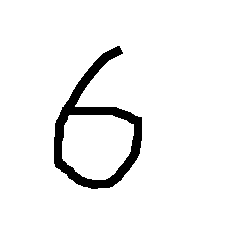

In [60]:
newImg

In [62]:
help(im.tostring)

Help on method tostring in module PIL.Image:

tostring(*args, **kw) method of PIL.PngImagePlugin.PngImageFile instance



In [72]:
with open('./temp.png','rb') as f:
    str = f.read()
#     print(str)
    li = [i for i in str]
    print(len(li))
    

3279


In [80]:
250 * 250 * 4

250000

In [74]:
data=im.tobytes('raw','RGBA')

In [77]:
len([i for i in data])

250000

In [78]:
len(data)

250000

In [91]:
np.array([i for i in data])[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [102]:
hex_list = [hex(i) for i in data]

In [103]:
len(hex_list)

250000

In [104]:
hex_list[1]

'0x0'

In [106]:
ba = bytearray(h.decode("hex") for h in hex_list)


AttributeError: 'str' object has no attribute 'decode'

In [115]:
br = bytearray([i for i in data])

In [123]:
type(data)

bytes

In [124]:
import array

In [127]:
by_str = array.array('B', [17, 24, 121, 1, 12, 222, 34, 76]).tostring()

In [128]:
len(by_str)

8

In [129]:
bt_str = array.array('B', [i for i in data]).tostring()

In [131]:
len(bt_str)

250000

In [132]:
newImg3 = Image.frombytes(data=bt_str,size=(250,250), mode='RGBA')

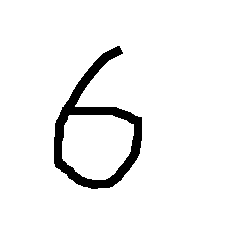

In [133]:
newImg3